In [1]:
!pip install tables
!pip install h5py

import os,sys,numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


Activate the OpenVisus HDF5 vol connector

In [2]:
%env HDF5_PLUGIN_PATH=C:\projects\OpenVisus\build\RelWithDebInfo\OpenVisus\bin
%env HDF5_VOL_CONNECTOR=openvisus_vol under_vol=0;under_info={};
%env PYTHONPATH=C:\projects\OpenVisus\build\RelWithDebInfo

import sys
sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo\OpenVisus\bin")
import h5py

# NOTE you should see a message like "openvisus_vol_init" in the console

env: HDF5_PLUGIN_PATH=C:\projects\OpenVisus\build\RelWithDebInfo\OpenVisus\bin
env: HDF5_VOL_CONNECTOR=openvisus_vol under_vol=0;under_info={};
env: PYTHONPATH=C:\projects\OpenVisus\build\RelWithDebInfo
Starting OpenVisus C:\projects\OpenVisus\build\RelWithDebInfo\OpenVisus\__init__.py 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)] sys.version_info(major=3, minor=8, micro=6, releaselevel='final', serial=0) ...


Create an HDF5 which points to an idx (NOTE: since the *.idx file already exists it wont be overwritten)

In [3]:
idx_filename=r"D:\GoogleSci\visus_dataset\2kbit1\zip\rowmajor\visus.idx"
h5_filename=os.path.splitext(idx_filename)[0] +".h5"

with h5py.File(h5_filename, "w") as f:
  group = f.create_group("group")
  dataset = group.create_dataset(idx_filename, shape=list(reversed([2048,2048,2048])), dtype=np.uint8)

Read the HDF5 (i.e. read from OpenVisus IDX)

<HDF5 dataset "D:\GoogleSci\visus_dataset\2kbit1\zip\rowmajor\visus.idx": shape (2048, 2048, 2048), type "|u1">
(100, 100) uint8


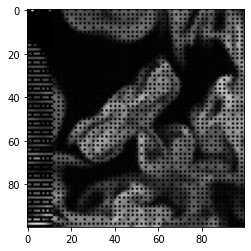

In [4]:
with h5py.File(h5_filename,'r') as f:
    dataset=f["group"][idx_filename]
    print(repr(dataset))
    data=dataset[1024,500:600,500:600]
    print(data.shape,data.dtype)
    plt.imshow(data,cmap='gray')